In [1]:
import networkx 
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload

In [2]:
def simulator(rounds, N, gamma, beta, adj_matrix,v,theta):
    infected = np.zeros((N,),dtype=int) # Array of Healthy people
    infected[1]=1 # 1st person in the Array of healthy people gets infected
    total_infected = np.zeros(rounds) # Array to monitor the total number of infected people in each round
    sick = 1
    healthy= N - sick
    for i in range(rounds):
        if(i==2):                       
            for person in range(int(N*v*theta)):
                immunePerson = random.randint(0,N-1)
                if(infected[immunePerson]==1):
                    sick = sick -1;
                    healthy=healthy+1
                
                infected[immunePerson] = -1
            immunePerson_index = np.where(infected==-1)       
        infected_index_list = np.where(infected==1)   #To find the index of the people who are infected
        
        for index in infected_index_list:    #To Check if the peorson who is infected is still infectious at each round 
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) #get row in adj matrix of infected person and assign rand nums to their connections
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] #find indices that match these conditions, they become infected
            for j in new_infected_indices:
                if(infected[j]==0):                    # if the person is healthy and his prob<=infectionrate infect the person
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        print("number of infected people in round ",i,"is ",sick)
        print("number of people healthy in round ",i,"is",healthy)
        total_infected[i]= np.sum(np.where(infected>0,infected,0))    
    return total_infected

In [3]:
rounds = 1000
N = 1000                        # Total population 
p = .01                         # Probability of connection between 2 people in population
gamma = .05                     # Probabilty of contact with a infected person connection
beta = .05                      # Probability of infection given contact with an infected person
V1 = 0.5                       # Portion of population vaccinated for community 1
V2 = 0.85                        # Portion of population vaccinated for community 2
theta = 0.4                     # Vaccination protection rate

In [4]:
#Generate G(n,p)
G_active = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G_active).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V1,theta)

number of infected people in round  0 is  1
number of people healthy in round  0 is 999
number of infected people in round  1 is  1
number of people healthy in round  1 is 999
number of infected people in round  2 is  1
number of people healthy in round  2 is 999
number of infected people in round  3 is  1
number of people healthy in round  3 is 999
number of infected people in round  4 is  1
number of people healthy in round  4 is 999
number of infected people in round  5 is  1
number of people healthy in round  5 is 999
number of infected people in round  6 is  1
number of people healthy in round  6 is 999
number of infected people in round  7 is  1
number of people healthy in round  7 is 999
number of infected people in round  8 is  1
number of people healthy in round  8 is 999
number of infected people in round  9 is  1
number of people healthy in round  9 is 999
number of infected people in round  10 is  1
number of people healthy in round  10 is 999
number of infected people in r

number of infected people in round  301 is  32
number of people healthy in round  301 is 968
number of infected people in round  302 is  32
number of people healthy in round  302 is 968
number of infected people in round  303 is  34
number of people healthy in round  303 is 966
number of infected people in round  304 is  35
number of people healthy in round  304 is 965
number of infected people in round  305 is  36
number of people healthy in round  305 is 964
number of infected people in round  306 is  37
number of people healthy in round  306 is 963
number of infected people in round  307 is  37
number of people healthy in round  307 is 963
number of infected people in round  308 is  37
number of people healthy in round  308 is 963
number of infected people in round  309 is  39
number of people healthy in round  309 is 961
number of infected people in round  310 is  40
number of people healthy in round  310 is 960
number of infected people in round  311 is  40
number of people health

number of infected people in round  445 is  162
number of people healthy in round  445 is 838
number of infected people in round  446 is  164
number of people healthy in round  446 is 836
number of infected people in round  447 is  166
number of people healthy in round  447 is 834
number of infected people in round  448 is  169
number of people healthy in round  448 is 831
number of infected people in round  449 is  169
number of people healthy in round  449 is 831
number of infected people in round  450 is  171
number of people healthy in round  450 is 829
number of infected people in round  451 is  172
number of people healthy in round  451 is 828
number of infected people in round  452 is  174
number of people healthy in round  452 is 826
number of infected people in round  453 is  175
number of people healthy in round  453 is 825
number of infected people in round  454 is  176
number of people healthy in round  454 is 824
number of infected people in round  455 is  181
number of pe

number of infected people in round  556 is  307
number of people healthy in round  556 is 693
number of infected people in round  557 is  310
number of people healthy in round  557 is 690
number of infected people in round  558 is  310
number of people healthy in round  558 is 690
number of infected people in round  559 is  312
number of people healthy in round  559 is 688
number of infected people in round  560 is  314
number of people healthy in round  560 is 686
number of infected people in round  561 is  316
number of people healthy in round  561 is 684
number of infected people in round  562 is  318
number of people healthy in round  562 is 682
number of infected people in round  563 is  319
number of people healthy in round  563 is 681
number of infected people in round  564 is  319
number of people healthy in round  564 is 681
number of infected people in round  565 is  321
number of people healthy in round  565 is 679
number of infected people in round  566 is  322
number of pe

number of infected people in round  670 is  429
number of people healthy in round  670 is 571
number of infected people in round  671 is  431
number of people healthy in round  671 is 569
number of infected people in round  672 is  433
number of people healthy in round  672 is 567
number of infected people in round  673 is  433
number of people healthy in round  673 is 567
number of infected people in round  674 is  434
number of people healthy in round  674 is 566
number of infected people in round  675 is  435
number of people healthy in round  675 is 565
number of infected people in round  676 is  438
number of people healthy in round  676 is 562
number of infected people in round  677 is  441
number of people healthy in round  677 is 559
number of infected people in round  678 is  441
number of people healthy in round  678 is 559
number of infected people in round  679 is  441
number of people healthy in round  679 is 559
number of infected people in round  680 is  443
number of pe

number of infected people in round  770 is  512
number of people healthy in round  770 is 488
number of infected people in round  771 is  512
number of people healthy in round  771 is 488
number of infected people in round  772 is  514
number of people healthy in round  772 is 486
number of infected people in round  773 is  515
number of people healthy in round  773 is 485
number of infected people in round  774 is  516
number of people healthy in round  774 is 484
number of infected people in round  775 is  516
number of people healthy in round  775 is 484
number of infected people in round  776 is  517
number of people healthy in round  776 is 483
number of infected people in round  777 is  517
number of people healthy in round  777 is 483
number of infected people in round  778 is  517
number of people healthy in round  778 is 483
number of infected people in round  779 is  520
number of people healthy in round  779 is 480
number of infected people in round  780 is  521
number of pe

number of infected people in round  885 is  593
number of people healthy in round  885 is 407
number of infected people in round  886 is  593
number of people healthy in round  886 is 407
number of infected people in round  887 is  593
number of people healthy in round  887 is 407
number of infected people in round  888 is  596
number of people healthy in round  888 is 404
number of infected people in round  889 is  596
number of people healthy in round  889 is 404
number of infected people in round  890 is  597
number of people healthy in round  890 is 403
number of infected people in round  891 is  598
number of people healthy in round  891 is 402
number of infected people in round  892 is  598
number of people healthy in round  892 is 402
number of infected people in round  893 is  598
number of people healthy in round  893 is 402
number of infected people in round  894 is  600
number of people healthy in round  894 is 400
number of infected people in round  895 is  600
number of pe

number of infected people in round  984 is  634
number of people healthy in round  984 is 366
number of infected people in round  985 is  634
number of people healthy in round  985 is 366
number of infected people in round  986 is  634
number of people healthy in round  986 is 366
number of infected people in round  987 is  635
number of people healthy in round  987 is 365
number of infected people in round  988 is  635
number of people healthy in round  988 is 365
number of infected people in round  989 is  635
number of people healthy in round  989 is 365
number of infected people in round  990 is  635
number of people healthy in round  990 is 365
number of infected people in round  991 is  636
number of people healthy in round  991 is 364
number of infected people in round  992 is  637
number of people healthy in round  992 is 363
number of infected people in round  993 is  637
number of people healthy in round  993 is 363
number of infected people in round  994 is  638
number of pe

In [5]:
df_infected = pd.DataFrame(data=total_infected)
df_infected = df_infected.rename(columns={0:'infected'})
df_infected = df_infected.reset_index()
df_infected = df_infected.rename(columns={'index':'rounds'})
df_infected['P'] = p

### 30 % increase in the connections to a population with a vaccination rate of 0.5

In [6]:

p=0.13
#Generate G(n,p)
G = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V1,theta)

number of infected people in round  0 is  1
number of people healthy in round  0 is 999
number of infected people in round  1 is  1
number of people healthy in round  1 is 999
number of infected people in round  2 is  1
number of people healthy in round  2 is 999
number of infected people in round  3 is  1
number of people healthy in round  3 is 999
number of infected people in round  4 is  1
number of people healthy in round  4 is 999
number of infected people in round  5 is  1
number of people healthy in round  5 is 999
number of infected people in round  6 is  2
number of people healthy in round  6 is 998
number of infected people in round  7 is  2
number of people healthy in round  7 is 998
number of infected people in round  8 is  3
number of people healthy in round  8 is 997
number of infected people in round  9 is  3
number of people healthy in round  9 is 997
number of infected people in round  10 is  4
number of people healthy in round  10 is 996
number of infected people in r

number of infected people in round  140 is  245
number of people healthy in round  140 is 755
number of infected people in round  141 is  247
number of people healthy in round  141 is 753
number of infected people in round  142 is  248
number of people healthy in round  142 is 752
number of infected people in round  143 is  249
number of people healthy in round  143 is 751
number of infected people in round  144 is  250
number of people healthy in round  144 is 750
number of infected people in round  145 is  252
number of people healthy in round  145 is 748
number of infected people in round  146 is  254
number of people healthy in round  146 is 746
number of infected people in round  147 is  256
number of people healthy in round  147 is 744
number of infected people in round  148 is  258
number of people healthy in round  148 is 742
number of infected people in round  149 is  263
number of people healthy in round  149 is 737
number of infected people in round  150 is  263
number of pe

number of infected people in round  271 is  425
number of people healthy in round  271 is 575
number of infected people in round  272 is  426
number of people healthy in round  272 is 574
number of infected people in round  273 is  427
number of people healthy in round  273 is 573
number of infected people in round  274 is  427
number of people healthy in round  274 is 573
number of infected people in round  275 is  427
number of people healthy in round  275 is 573
number of infected people in round  276 is  427
number of people healthy in round  276 is 573
number of infected people in round  277 is  428
number of people healthy in round  277 is 572
number of infected people in round  278 is  430
number of people healthy in round  278 is 570
number of infected people in round  279 is  430
number of people healthy in round  279 is 570
number of infected people in round  280 is  430
number of people healthy in round  280 is 570
number of infected people in round  281 is  430
number of pe

number of infected people in round  373 is  509
number of people healthy in round  373 is 491
number of infected people in round  374 is  509
number of people healthy in round  374 is 491
number of infected people in round  375 is  509
number of people healthy in round  375 is 491
number of infected people in round  376 is  510
number of people healthy in round  376 is 490
number of infected people in round  377 is  510
number of people healthy in round  377 is 490
number of infected people in round  378 is  512
number of people healthy in round  378 is 488
number of infected people in round  379 is  512
number of people healthy in round  379 is 488
number of infected people in round  380 is  512
number of people healthy in round  380 is 488
number of infected people in round  381 is  514
number of people healthy in round  381 is 486
number of infected people in round  382 is  514
number of people healthy in round  382 is 486
number of infected people in round  383 is  515
number of pe

number of infected people in round  466 is  568
number of people healthy in round  466 is 432
number of infected people in round  467 is  568
number of people healthy in round  467 is 432
number of infected people in round  468 is  570
number of people healthy in round  468 is 430
number of infected people in round  469 is  570
number of people healthy in round  469 is 430
number of infected people in round  470 is  570
number of people healthy in round  470 is 430
number of infected people in round  471 is  571
number of people healthy in round  471 is 429
number of infected people in round  472 is  572
number of people healthy in round  472 is 428
number of infected people in round  473 is  573
number of people healthy in round  473 is 427
number of infected people in round  474 is  576
number of people healthy in round  474 is 424
number of infected people in round  475 is  578
number of people healthy in round  475 is 422
number of infected people in round  476 is  578
number of pe

number of infected people in round  588 is  630
number of people healthy in round  588 is 370
number of infected people in round  589 is  630
number of people healthy in round  589 is 370
number of infected people in round  590 is  630
number of people healthy in round  590 is 370
number of infected people in round  591 is  630
number of people healthy in round  591 is 370
number of infected people in round  592 is  630
number of people healthy in round  592 is 370
number of infected people in round  593 is  630
number of people healthy in round  593 is 370
number of infected people in round  594 is  631
number of people healthy in round  594 is 369
number of infected people in round  595 is  632
number of people healthy in round  595 is 368
number of infected people in round  596 is  632
number of people healthy in round  596 is 368
number of infected people in round  597 is  632
number of people healthy in round  597 is 368
number of infected people in round  598 is  633
number of pe

number of infected people in round  705 is  685
number of people healthy in round  705 is 315
number of infected people in round  706 is  686
number of people healthy in round  706 is 314
number of infected people in round  707 is  686
number of people healthy in round  707 is 314
number of infected people in round  708 is  686
number of people healthy in round  708 is 314
number of infected people in round  709 is  686
number of people healthy in round  709 is 314
number of infected people in round  710 is  686
number of people healthy in round  710 is 314
number of infected people in round  711 is  686
number of people healthy in round  711 is 314
number of infected people in round  712 is  686
number of people healthy in round  712 is 314
number of infected people in round  713 is  686
number of people healthy in round  713 is 314
number of infected people in round  714 is  688
number of people healthy in round  714 is 312
number of infected people in round  715 is  688
number of pe

number of infected people in round  814 is  713
number of people healthy in round  814 is 287
number of infected people in round  815 is  713
number of people healthy in round  815 is 287
number of infected people in round  816 is  713
number of people healthy in round  816 is 287
number of infected people in round  817 is  714
number of people healthy in round  817 is 286
number of infected people in round  818 is  716
number of people healthy in round  818 is 284
number of infected people in round  819 is  716
number of people healthy in round  819 is 284
number of infected people in round  820 is  717
number of people healthy in round  820 is 283
number of infected people in round  821 is  717
number of people healthy in round  821 is 283
number of infected people in round  822 is  719
number of people healthy in round  822 is 281
number of infected people in round  823 is  719
number of people healthy in round  823 is 281
number of infected people in round  824 is  719
number of pe

number of infected people in round  918 is  740
number of people healthy in round  918 is 260
number of infected people in round  919 is  740
number of people healthy in round  919 is 260
number of infected people in round  920 is  740
number of people healthy in round  920 is 260
number of infected people in round  921 is  740
number of people healthy in round  921 is 260
number of infected people in round  922 is  741
number of people healthy in round  922 is 259
number of infected people in round  923 is  741
number of people healthy in round  923 is 259
number of infected people in round  924 is  741
number of people healthy in round  924 is 259
number of infected people in round  925 is  741
number of people healthy in round  925 is 259
number of infected people in round  926 is  741
number of people healthy in round  926 is 259
number of infected people in round  927 is  741
number of people healthy in round  927 is 259
number of infected people in round  928 is  741
number of pe

In [7]:
df_infected_new = pd.DataFrame(data=total_infected)
df_infected_new = df_infected_new.rename(columns={0:'infected'})
df_infected_new = df_infected_new.reset_index()
df_infected_new = df_infected_new.rename(columns={'index':'rounds'})
df_infected_new['P'] = p
df_infected = df_infected.append(df_infected_new)
#df_infected

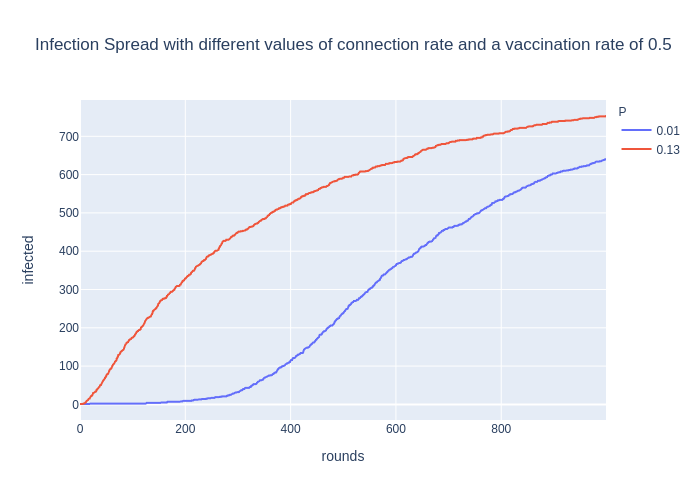

In [8]:
fig = px.line(df_infected, x="rounds", y="infected",color="P",title="Infection Spread with different values of connection rate and a vaccination rate of 0.5")
fig.write_image("../images/infectionSpreadWithConnectionrateV1.png")
Image(filename="../images/infectionSpreadWithConnectionrateV1.png")
#fig.show()

In [9]:
p=0.1
#Generate G(n,p)
G_active = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G_active).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V2,theta)
df_infected = pd.DataFrame(data=total_infected)
df_infected = df_infected.rename(columns={0:'infected'})
df_infected = df_infected.reset_index()
df_infected = df_infected.rename(columns={'index':'rounds'})
df_infected['P'] = p

number of infected people in round  0 is  1
number of people healthy in round  0 is 999
number of infected people in round  1 is  2
number of people healthy in round  1 is 998
number of infected people in round  2 is  1
number of people healthy in round  2 is 999
number of infected people in round  3 is  1
number of people healthy in round  3 is 999
number of infected people in round  4 is  1
number of people healthy in round  4 is 999
number of infected people in round  5 is  1
number of people healthy in round  5 is 999
number of infected people in round  6 is  1
number of people healthy in round  6 is 999
number of infected people in round  7 is  1
number of people healthy in round  7 is 999
number of infected people in round  8 is  1
number of people healthy in round  8 is 999
number of infected people in round  9 is  1
number of people healthy in round  9 is 999
number of infected people in round  10 is  1
number of people healthy in round  10 is 999
number of infected people in r

number of people healthy in round  159 is 786
number of infected people in round  160 is  215
number of people healthy in round  160 is 785
number of infected people in round  161 is  215
number of people healthy in round  161 is 785
number of infected people in round  162 is  215
number of people healthy in round  162 is 785
number of infected people in round  163 is  216
number of people healthy in round  163 is 784
number of infected people in round  164 is  216
number of people healthy in round  164 is 784
number of infected people in round  165 is  217
number of people healthy in round  165 is 783
number of infected people in round  166 is  219
number of people healthy in round  166 is 781
number of infected people in round  167 is  220
number of people healthy in round  167 is 780
number of infected people in round  168 is  220
number of people healthy in round  168 is 780
number of infected people in round  169 is  220
number of people healthy in round  169 is 780
number of infe

number of infected people in round  302 is  366
number of people healthy in round  302 is 634
number of infected people in round  303 is  366
number of people healthy in round  303 is 634
number of infected people in round  304 is  367
number of people healthy in round  304 is 633
number of infected people in round  305 is  369
number of people healthy in round  305 is 631
number of infected people in round  306 is  369
number of people healthy in round  306 is 631
number of infected people in round  307 is  369
number of people healthy in round  307 is 631
number of infected people in round  308 is  370
number of people healthy in round  308 is 630
number of infected people in round  309 is  370
number of people healthy in round  309 is 630
number of infected people in round  310 is  371
number of people healthy in round  310 is 629
number of infected people in round  311 is  372
number of people healthy in round  311 is 628
number of infected people in round  312 is  372
number of pe

number of infected people in round  412 is  458
number of people healthy in round  412 is 542
number of infected people in round  413 is  459
number of people healthy in round  413 is 541
number of infected people in round  414 is  460
number of people healthy in round  414 is 540
number of infected people in round  415 is  460
number of people healthy in round  415 is 540
number of infected people in round  416 is  460
number of people healthy in round  416 is 540
number of infected people in round  417 is  460
number of people healthy in round  417 is 540
number of infected people in round  418 is  460
number of people healthy in round  418 is 540
number of infected people in round  419 is  460
number of people healthy in round  419 is 540
number of infected people in round  420 is  462
number of people healthy in round  420 is 538
number of infected people in round  421 is  463
number of people healthy in round  421 is 537
number of infected people in round  422 is  463
number of pe

number of infected people in round  507 is  528
number of people healthy in round  507 is 472
number of infected people in round  508 is  529
number of people healthy in round  508 is 471
number of infected people in round  509 is  530
number of people healthy in round  509 is 470
number of infected people in round  510 is  531
number of people healthy in round  510 is 469
number of infected people in round  511 is  531
number of people healthy in round  511 is 469
number of infected people in round  512 is  531
number of people healthy in round  512 is 469
number of infected people in round  513 is  531
number of people healthy in round  513 is 469
number of infected people in round  514 is  531
number of people healthy in round  514 is 469
number of infected people in round  515 is  534
number of people healthy in round  515 is 466
number of infected people in round  516 is  535
number of people healthy in round  516 is 465
number of infected people in round  517 is  535
number of pe

number of infected people in round  598 is  564
number of people healthy in round  598 is 436
number of infected people in round  599 is  565
number of people healthy in round  599 is 435
number of infected people in round  600 is  565
number of people healthy in round  600 is 435
number of infected people in round  601 is  565
number of people healthy in round  601 is 435
number of infected people in round  602 is  566
number of people healthy in round  602 is 434
number of infected people in round  603 is  566
number of people healthy in round  603 is 434
number of infected people in round  604 is  566
number of people healthy in round  604 is 434
number of infected people in round  605 is  566
number of people healthy in round  605 is 434
number of infected people in round  606 is  566
number of people healthy in round  606 is 434
number of infected people in round  607 is  566
number of people healthy in round  607 is 434
number of infected people in round  608 is  567
number of pe

number of infected people in round  725 is  606
number of people healthy in round  725 is 394
number of infected people in round  726 is  606
number of people healthy in round  726 is 394
number of infected people in round  727 is  606
number of people healthy in round  727 is 394
number of infected people in round  728 is  607
number of people healthy in round  728 is 393
number of infected people in round  729 is  608
number of people healthy in round  729 is 392
number of infected people in round  730 is  608
number of people healthy in round  730 is 392
number of infected people in round  731 is  609
number of people healthy in round  731 is 391
number of infected people in round  732 is  609
number of people healthy in round  732 is 391
number of infected people in round  733 is  609
number of people healthy in round  733 is 391
number of infected people in round  734 is  610
number of people healthy in round  734 is 390
number of infected people in round  735 is  610
number of pe

number of infected people in round  845 is  638
number of people healthy in round  845 is 362
number of infected people in round  846 is  638
number of people healthy in round  846 is 362
number of infected people in round  847 is  638
number of people healthy in round  847 is 362
number of infected people in round  848 is  638
number of people healthy in round  848 is 362
number of infected people in round  849 is  639
number of people healthy in round  849 is 361
number of infected people in round  850 is  640
number of people healthy in round  850 is 360
number of infected people in round  851 is  640
number of people healthy in round  851 is 360
number of infected people in round  852 is  640
number of people healthy in round  852 is 360
number of infected people in round  853 is  640
number of people healthy in round  853 is 360
number of infected people in round  854 is  640
number of people healthy in round  854 is 360
number of infected people in round  855 is  640
number of pe

number of infected people in round  963 is  661
number of people healthy in round  963 is 339
number of infected people in round  964 is  661
number of people healthy in round  964 is 339
number of infected people in round  965 is  661
number of people healthy in round  965 is 339
number of infected people in round  966 is  661
number of people healthy in round  966 is 339
number of infected people in round  967 is  661
number of people healthy in round  967 is 339
number of infected people in round  968 is  661
number of people healthy in round  968 is 339
number of infected people in round  969 is  661
number of people healthy in round  969 is 339
number of infected people in round  970 is  661
number of people healthy in round  970 is 339
number of infected people in round  971 is  661
number of people healthy in round  971 is 339
number of infected people in round  972 is  661
number of people healthy in round  972 is 339
number of infected people in round  973 is  661
number of pe

### 30 % increase in the connections to a population with a V2 vaccination rate of 0.85

In [10]:
p=0.013
#Generate G(n,p)
G_active = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G_active).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V2,theta)
df_infected_new = pd.DataFrame(data=total_infected)
df_infected_new = df_infected_new.rename(columns={0:'infected'})
df_infected_new = df_infected_new.reset_index()
df_infected_new = df_infected_new.rename(columns={'index':'rounds'})
df_infected_new['P'] = p
df_infected = df_infected.append(df_infected_new)

number of infected people in round  0 is  1
number of people healthy in round  0 is 999
number of infected people in round  1 is  1
number of people healthy in round  1 is 999
number of infected people in round  2 is  1
number of people healthy in round  2 is 999
number of infected people in round  3 is  1
number of people healthy in round  3 is 999
number of infected people in round  4 is  1
number of people healthy in round  4 is 999
number of infected people in round  5 is  1
number of people healthy in round  5 is 999
number of infected people in round  6 is  1
number of people healthy in round  6 is 999
number of infected people in round  7 is  1
number of people healthy in round  7 is 999
number of infected people in round  8 is  1
number of people healthy in round  8 is 999
number of infected people in round  9 is  1
number of people healthy in round  9 is 999
number of infected people in round  10 is  1
number of people healthy in round  10 is 999
number of infected people in r

number of infected people in round  247 is  110
number of people healthy in round  247 is 890
number of infected people in round  248 is  113
number of people healthy in round  248 is 887
number of infected people in round  249 is  113
number of people healthy in round  249 is 887
number of infected people in round  250 is  113
number of people healthy in round  250 is 887
number of infected people in round  251 is  114
number of people healthy in round  251 is 886
number of infected people in round  252 is  114
number of people healthy in round  252 is 886
number of infected people in round  253 is  114
number of people healthy in round  253 is 886
number of infected people in round  254 is  115
number of people healthy in round  254 is 885
number of infected people in round  255 is  115
number of people healthy in round  255 is 885
number of infected people in round  256 is  115
number of people healthy in round  256 is 885
number of infected people in round  257 is  117
number of pe

number of infected people in round  351 is  225
number of people healthy in round  351 is 775
number of infected people in round  352 is  226
number of people healthy in round  352 is 774
number of infected people in round  353 is  227
number of people healthy in round  353 is 773
number of infected people in round  354 is  227
number of people healthy in round  354 is 773
number of infected people in round  355 is  227
number of people healthy in round  355 is 773
number of infected people in round  356 is  227
number of people healthy in round  356 is 773
number of infected people in round  357 is  228
number of people healthy in round  357 is 772
number of infected people in round  358 is  229
number of people healthy in round  358 is 771
number of infected people in round  359 is  230
number of people healthy in round  359 is 770
number of infected people in round  360 is  231
number of people healthy in round  360 is 769
number of infected people in round  361 is  233
number of pe

number of infected people in round  502 is  344
number of people healthy in round  502 is 656
number of infected people in round  503 is  346
number of people healthy in round  503 is 654
number of infected people in round  504 is  346
number of people healthy in round  504 is 654
number of infected people in round  505 is  346
number of people healthy in round  505 is 654
number of infected people in round  506 is  349
number of people healthy in round  506 is 651
number of infected people in round  507 is  350
number of people healthy in round  507 is 650
number of infected people in round  508 is  351
number of people healthy in round  508 is 649
number of infected people in round  509 is  353
number of people healthy in round  509 is 647
number of infected people in round  510 is  353
number of people healthy in round  510 is 647
number of infected people in round  511 is  355
number of people healthy in round  511 is 645
number of infected people in round  512 is  355
number of pe

number of infected people in round  618 is  441
number of people healthy in round  618 is 559
number of infected people in round  619 is  442
number of people healthy in round  619 is 558
number of infected people in round  620 is  443
number of people healthy in round  620 is 557
number of infected people in round  621 is  443
number of people healthy in round  621 is 557
number of infected people in round  622 is  444
number of people healthy in round  622 is 556
number of infected people in round  623 is  445
number of people healthy in round  623 is 555
number of infected people in round  624 is  445
number of people healthy in round  624 is 555
number of infected people in round  625 is  446
number of people healthy in round  625 is 554
number of infected people in round  626 is  446
number of people healthy in round  626 is 554
number of infected people in round  627 is  446
number of people healthy in round  627 is 554
number of infected people in round  628 is  447
number of pe

number of infected people in round  718 is  504
number of people healthy in round  718 is 496
number of infected people in round  719 is  505
number of people healthy in round  719 is 495
number of infected people in round  720 is  505
number of people healthy in round  720 is 495
number of infected people in round  721 is  505
number of people healthy in round  721 is 495
number of infected people in round  722 is  507
number of people healthy in round  722 is 493
number of infected people in round  723 is  509
number of people healthy in round  723 is 491
number of infected people in round  724 is  509
number of people healthy in round  724 is 491
number of infected people in round  725 is  510
number of people healthy in round  725 is 490
number of infected people in round  726 is  510
number of people healthy in round  726 is 490
number of infected people in round  727 is  511
number of people healthy in round  727 is 489
number of infected people in round  728 is  511
number of pe

number of infected people in round  812 is  562
number of people healthy in round  812 is 438
number of infected people in round  813 is  562
number of people healthy in round  813 is 438
number of infected people in round  814 is  562
number of people healthy in round  814 is 438
number of infected people in round  815 is  562
number of people healthy in round  815 is 438
number of infected people in round  816 is  562
number of people healthy in round  816 is 438
number of infected people in round  817 is  563
number of people healthy in round  817 is 437
number of infected people in round  818 is  564
number of people healthy in round  818 is 436
number of infected people in round  819 is  564
number of people healthy in round  819 is 436
number of infected people in round  820 is  565
number of people healthy in round  820 is 435
number of infected people in round  821 is  565
number of people healthy in round  821 is 435
number of infected people in round  822 is  565
number of pe

number of infected people in round  940 is  610
number of people healthy in round  940 is 390
number of infected people in round  941 is  610
number of people healthy in round  941 is 390
number of infected people in round  942 is  610
number of people healthy in round  942 is 390
number of infected people in round  943 is  610
number of people healthy in round  943 is 390
number of infected people in round  944 is  611
number of people healthy in round  944 is 389
number of infected people in round  945 is  612
number of people healthy in round  945 is 388
number of infected people in round  946 is  612
number of people healthy in round  946 is 388
number of infected people in round  947 is  612
number of people healthy in round  947 is 388
number of infected people in round  948 is  612
number of people healthy in round  948 is 388
number of infected people in round  949 is  612
number of people healthy in round  949 is 388
number of infected people in round  950 is  613
number of pe

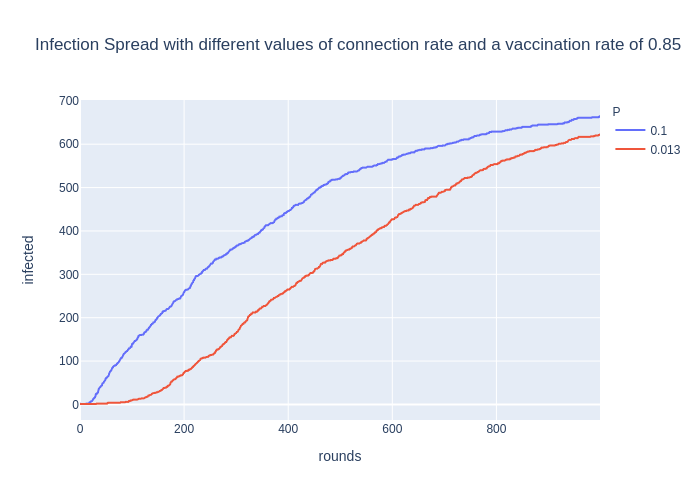

In [11]:
fig = px.line(df_infected, x="rounds", y="infected",color="P",title="Infection Spread with different values of connection rate and a vaccination rate of 0.85")
fig.write_image("../images/infectionSpreadWithConnectionrateV2.png")
Image(filename="../images/infectionSpreadWithConnectionrateV2.png")
#fig.show()